## Homework 12: Time Series Analysis
### Zain Ul Haq

In [22]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [23]:
df = pd.read_csv('karachi-weather-2021-2023.csv', parse_dates=['datetime'])
df = df.set_index('datetime')

### Q1 and Q2

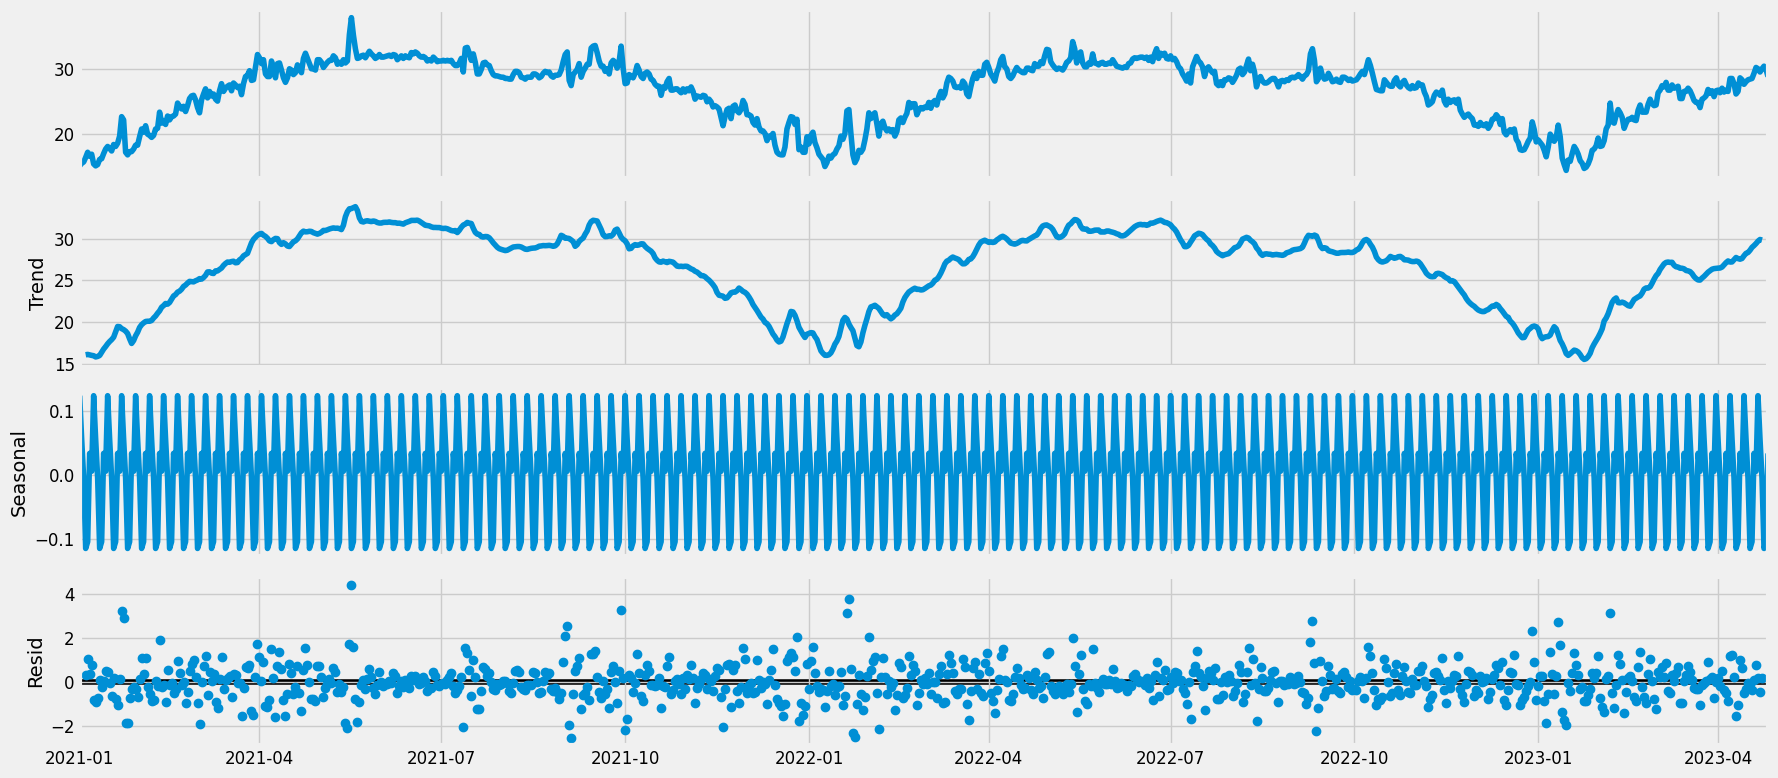

In [24]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()

In [25]:
df = df['temp'].resample('d').mean()


### We can see that there are seasonal trends supporting the increasing value of Bitcoin and how close the values are to zero are representative of negligible erros. The data is valid to be used for prediction of Karachi's weather.

### Q3

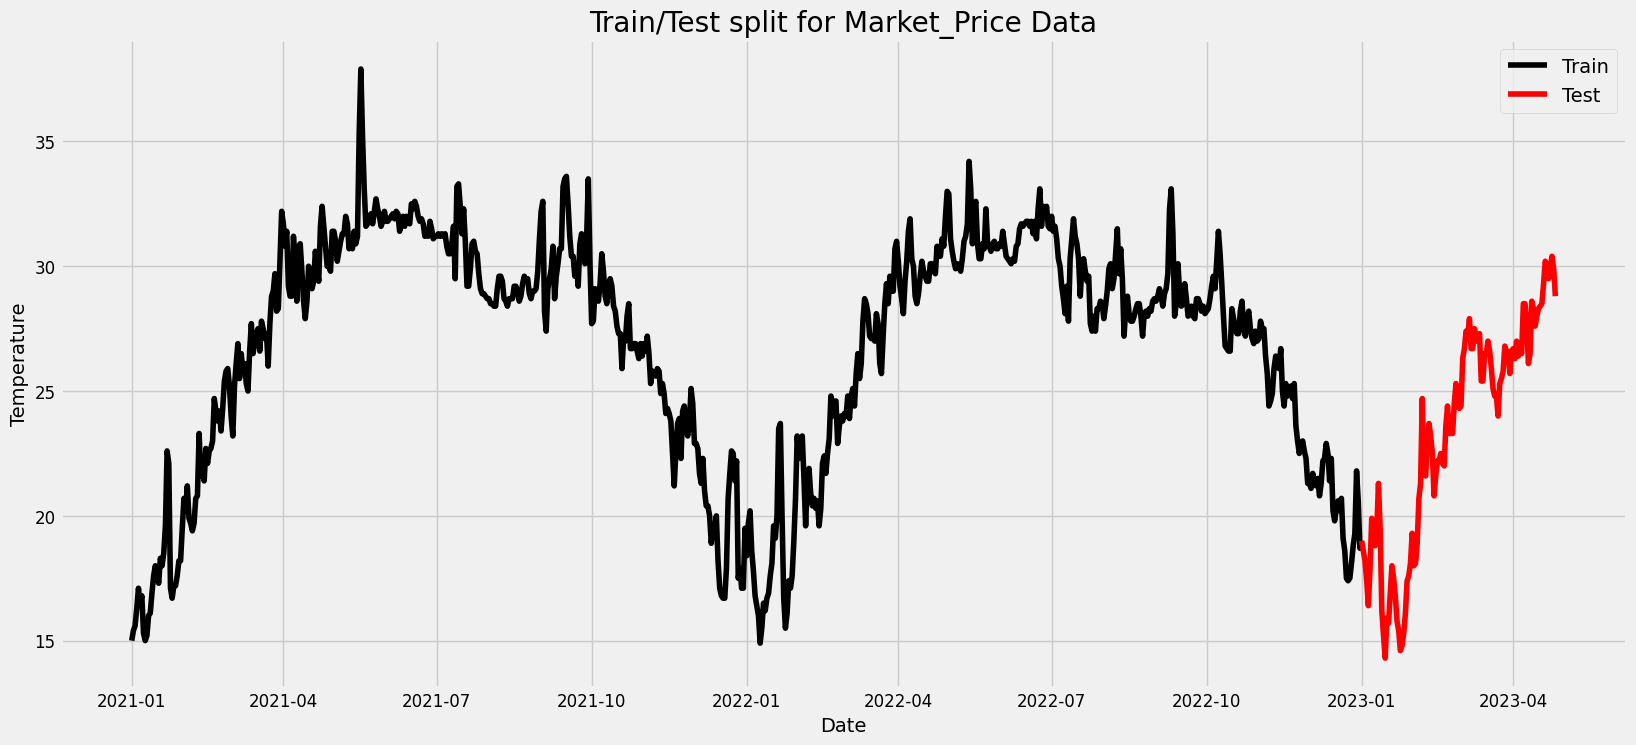

In [27]:
train = df[df.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Train/Test split for Market_Price Data")
plt.legend()
plt.show()


### The training in the model is represented by the black line
### Similarly, the red line represents the testing in the model

### Q4

In [7]:
from statsmodels.tsa.arima.model import ARIMA

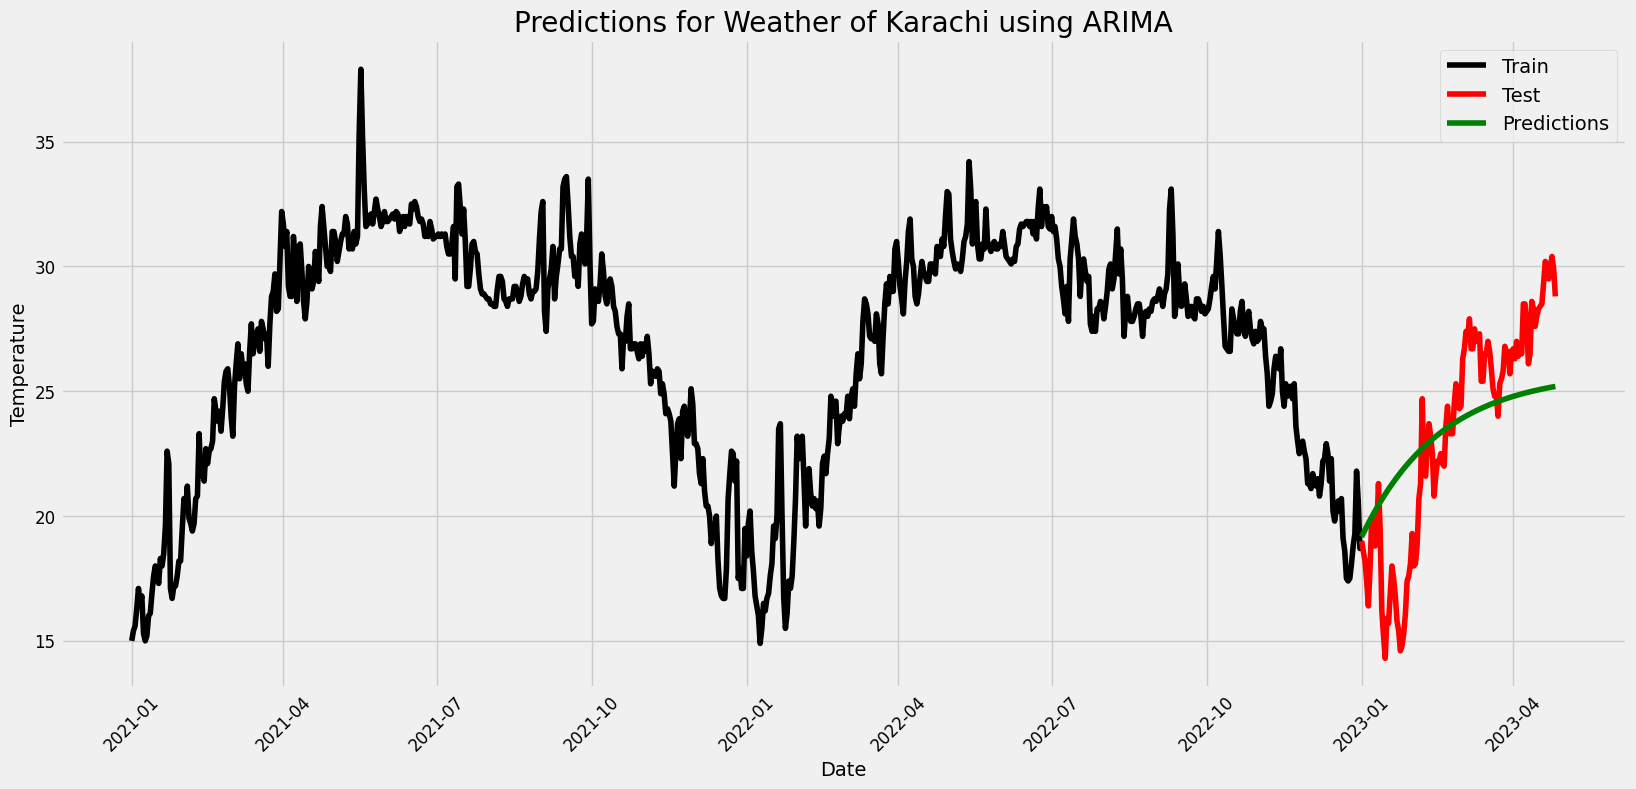

RMSE:  3.0565920481570608


In [28]:
ARIMAmodel = ARIMA(train, order = (1, 0, 1))

ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index)) 

y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for Weather of Karachi using ARIMA")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)


### RMSE = 3.05(1,0,1) the RMSE value is low so there is a high accuracy indicating that the predicted results and actual results are close to one another. 

## Q5

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6900.321911312563
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5911.191783529213
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3140.0147602303596
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3068.3219184946875
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3145.738782384189
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3141.2807016199317
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3070.336917403811
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3063.566538924222
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5916.922790146053
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4971.136429693168
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2609.4914767047967
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2537.3521578857517
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2618.1500740392953
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2623.2129465888675
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2539.7700134531333
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2535.0139828850088
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2034.3558104608856
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2005.3272552644398

### the lowest AIC is 2016 (the last value in the above answer) with optimal parameters: (1,1,1) (1,1,1,12)

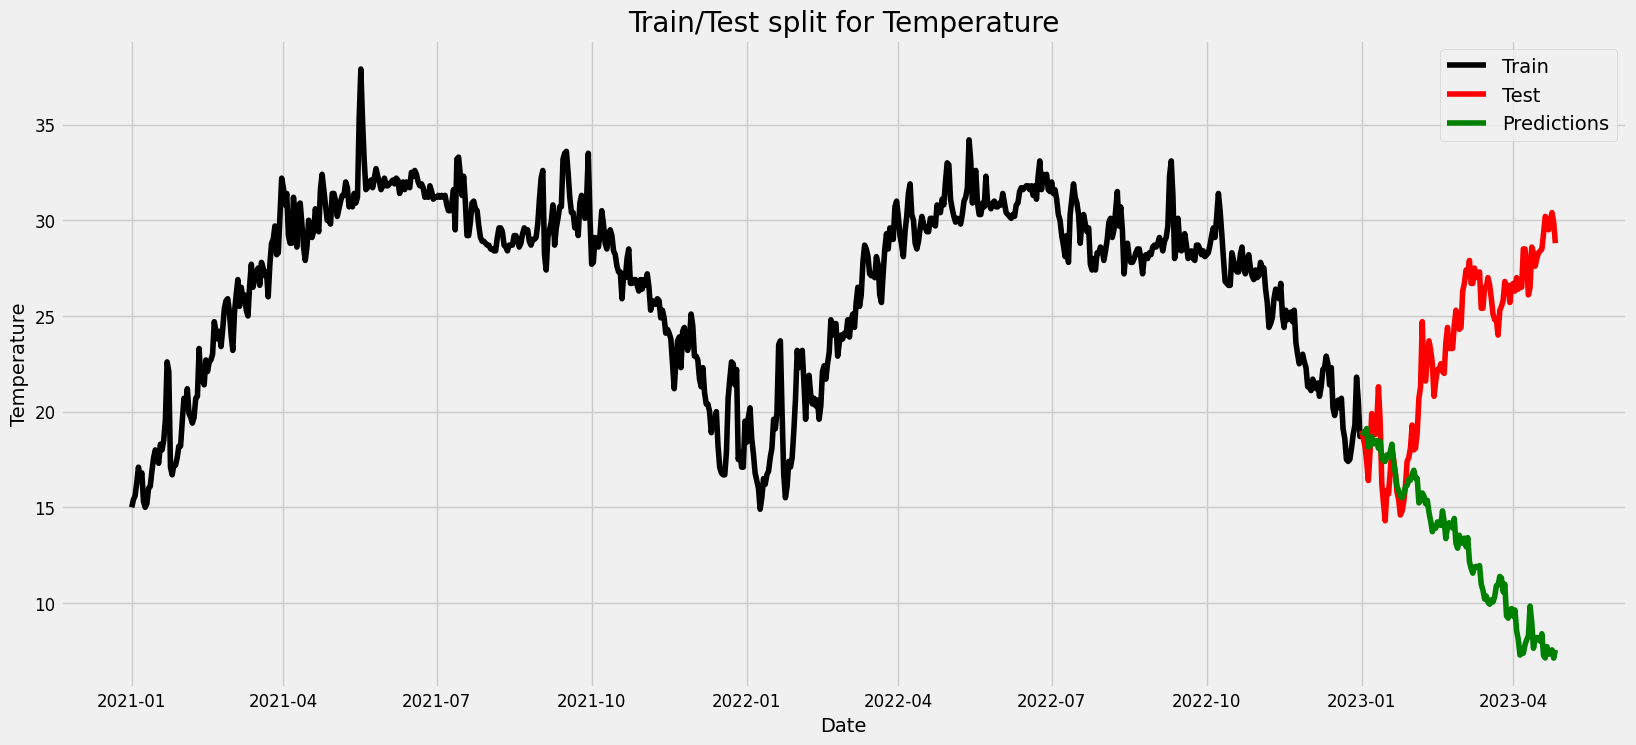

RMSE:  13.040963023360472


In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train,order=(1, 1, 1),seasonal_order=(1, 1, 0, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Train/Test split for Temperature")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

### Question 6

### The paramters (2,2,2) for ARIMAX give us an RMSE of 3.06, while SARIMAX gives 13.04 with values of order (1, 1, 1) and seasonal order (1, 1, 0, 52).

### Lower RMSE means igher accuracy hence ARIMA was much better than SARIMA, and is better equipped to deal with Karachi's temperature. 

### Difficult to find optimal parameters for SARIMAX.

### Q7

## ML tech 1

In [14]:
import numpy as np
 
# extract the seasonality data
months = [x.month for x in train.index]
years = [x.year for x in train.index]
day = [x.day for x in train.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train.values

# extract the day, month and year data
tmonths = [x.month for x in test.index]
tyears = [x.year for x in test.index]
tday = [x.day for x in test.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test.values

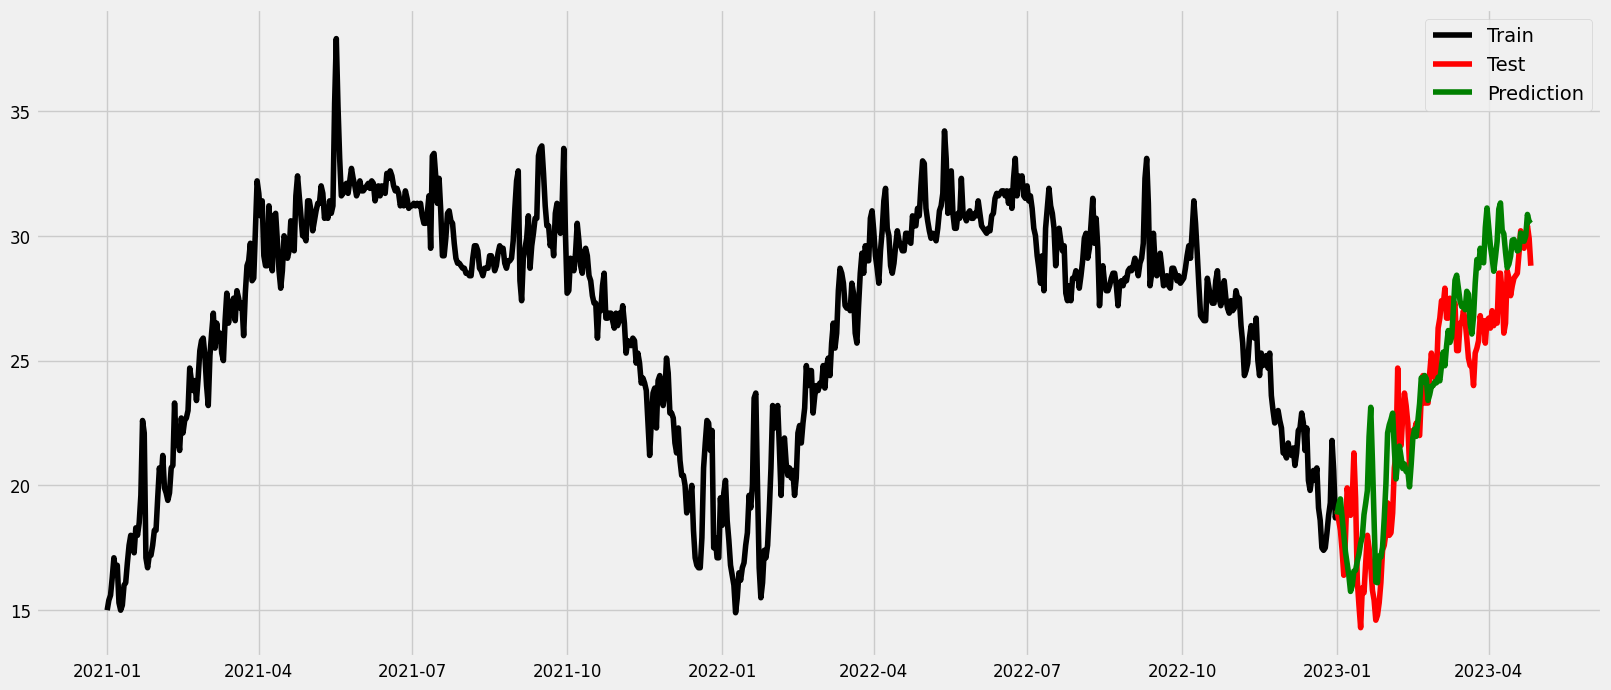

RMSE:  2.301552092498178


In [15]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor(random_state=10)
rfmodel.fit(X,Y)
 
# predict on the same period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train.index, train.values,color="black", label='Train')
plt.plot(test.index, test.values,color="red", label='Test')
plt.plot(test.index, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ",rf_rmse)

### RMSE  is low, 2.3 and the predicted values and actual values are similar. Hence, this model is great

## ML Tech 2

In [16]:
from sklearn.linear_model import LinearRegression

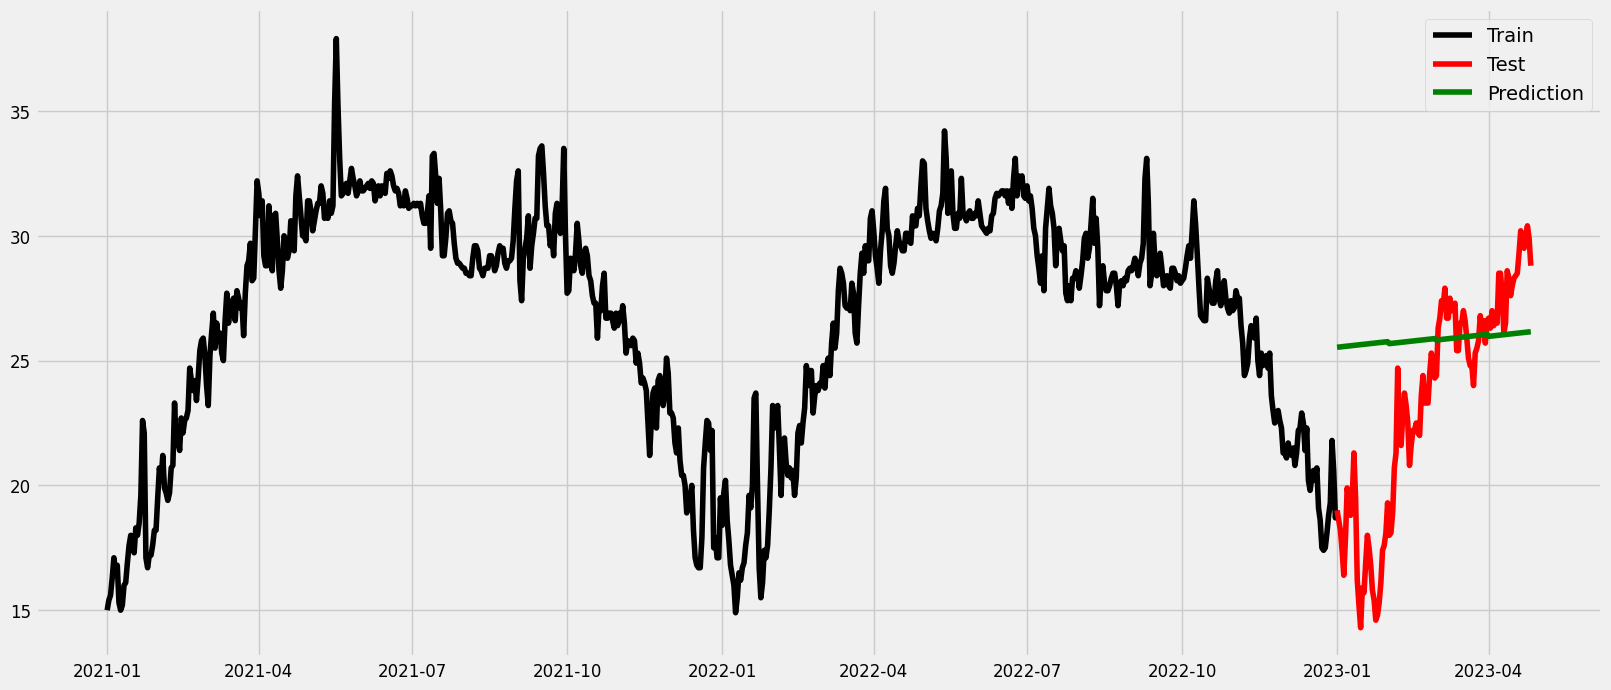

RMSE:  4.95875440008864


In [17]:
rfmodel = LinearRegression()
rfmodel.fit(X, Y)


preds = rfmodel.predict(testX)
plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(test.index, preds, color="green", label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test.values, preds))
print("RMSE: ", rf_rmse)


### RMSE value is higher for linear regression, i.e. 4.95 which is higher than rf model and the predicted values and actual values are not close. Hence, the accuray is low and it cannot predict Karachi's weather.

### Question 8

### Random Forest gives us a value of 2.3, which is the lowest. Then, ARIMA with 3.06, linear regression with 4.95 and SARIMA with 13.04! This makes Random forest the most elegible and SARIMA the most inaccurate to predict Karachi's weather.

### Q9

In [35]:
dates = pd.date_range(start='01/04/2023', end='31/12/2023')

In [36]:
t_months = [x.month for x in dates]
t_years = [x.year for x in dates]
t_day = [x.day for x in dates]

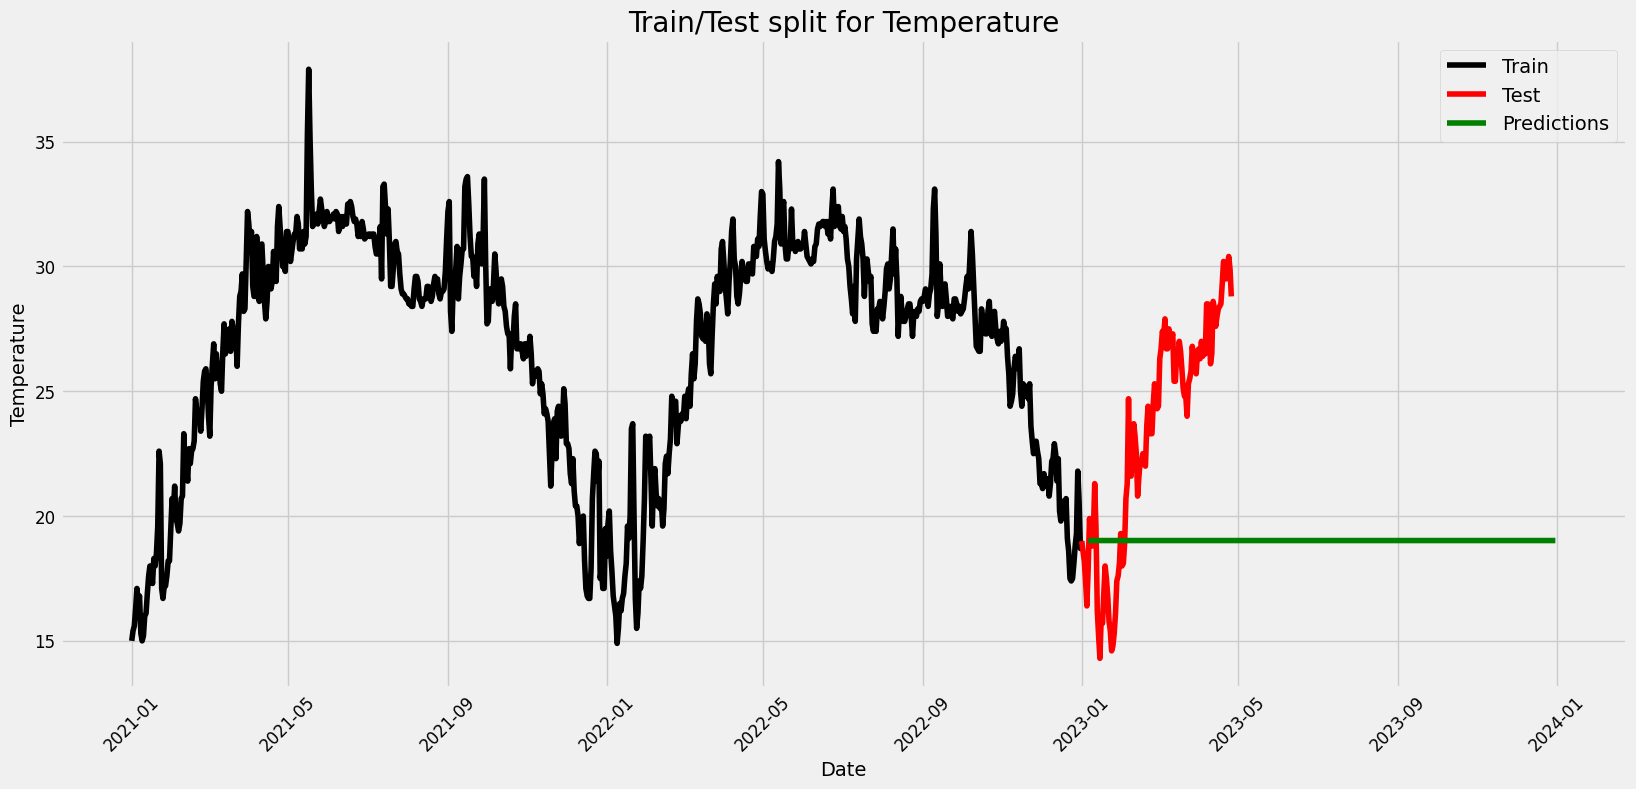

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SARIMAXmodel = SARIMAX(train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 52))
SARIMAXmodel = SARIMAXmodel.fit(disp=0)

y_pred = SARIMAXmodel.get_forecast(len(dates))
y_pred_df = y_pred.conf_int(alpha=0.45)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start=dates[0],
                                                end=dates[-1])
y_pred_df.index = dates
y_pred_out = y_pred_df["Predictions"]

plt.plot(train, color="black", label='Train')
plt.plot(test, color="red", label='Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temperature")

plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

### 10

### ML random Forest technique

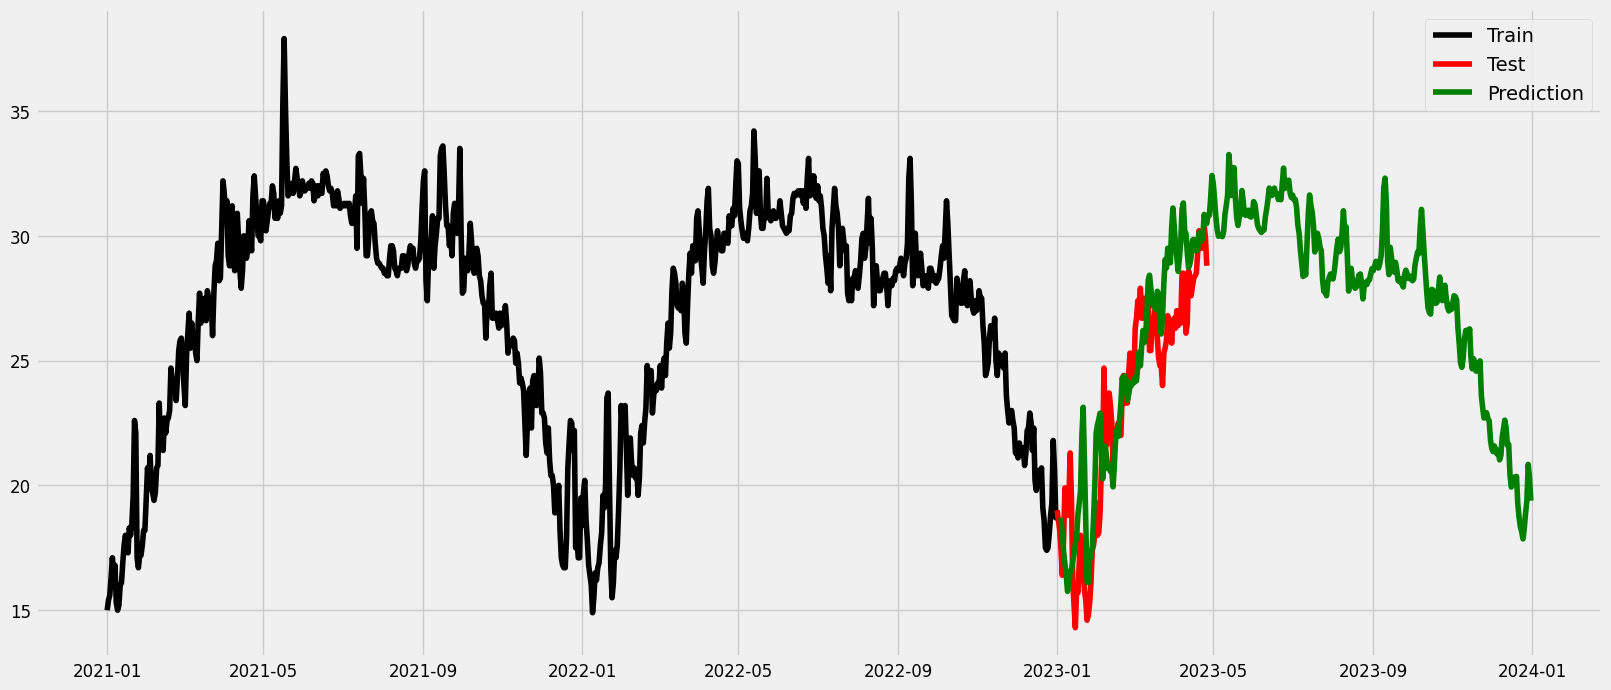

In [38]:
# convert into one matrix
testX = np.array([t_day, t_months, t_years]).T

# fit the model
rfmodel = RandomForestRegressor(random_state=10)
rfmodel.fit(X, Y)

preds = rfmodel.predict(testX)

plt.plot(train.index, train.values, color="black", label='Train')
plt.plot(test.index, test.values, color="red", label='Test')
plt.plot(dates, preds, color="green", label='Prediction')
plt.legend()
plt.show()

### Question 11

### SARIMAX and Random Forest yield quite different predictions. Random Forest predictions are more accurate than SARIMAX and unlike SARIMAX, Random Forest is able to predict the seasonal trend of the data.